In [1]:
# Import Libraries

# Data cleaning, EDA, and visual libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression Support Libraries
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

# Linear Regression Scoring Libraries

## 2. Gather Data

In [2]:
# Read the auto-mpg file
auto_mpg = pd.read_csv("auto-mpg.csv")
auto_mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
# Weight is in pounds (2.2 kg in a lb); Acceleration is in seconds to get to 60 mph.
# Origin is the region the vehicle came from: 1 = United States, 2 = Europe, 3 = Japan

## 3. Clean Data

### a. Convert data types

In [4]:
# Determine the number of null values
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
# Convert the origin column to a "object" data type.  This will help with the creation of dummy variables for the model.
auto_mpg["origin"] = auto_mpg["origin"].astype("object")
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 28.1+ KB


### b. Resolve data issues

#### i. Missing data

In [6]:
# Determining why "horsepower" is an object datatype
auto_mpg["horsepower"].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [7]:
auto_mpg.query("horsepower == '?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [8]:
auto_mpg["horsepower"] = pd.to_numeric(auto_mpg["horsepower"], errors="coerce")

auto_mpg.query("horsepower == '?'")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [9]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
auto_mpg[auto_mpg.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [11]:
# Fill in the missing values with the mean value of horsepower in the entire dataset
auto_mpg["horsepower"] = auto_mpg["horsepower"].fillna(auto_mpg["horsepower"].mean())
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [12]:
# Verifying NaN values no longer exist in the horsepower column
auto_mpg[auto_mpg.isna().any(axis=1)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


#### ii. Inconsistent Text & Typos

In [13]:
auto_mpg["car name"].value_counts()

car name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [14]:
# Checking for potential car name typos
from rapidfuzz import process, fuzz

# Assume df is your DataFrame and 'car name' is your column
car_names = auto_mpg['car name'].value_counts().index.tolist()

# Find similar names
similar_names = []
for name in car_names:
    matches = process.extract(name, car_names, scorer=fuzz.ratio, limit=5)
    similar_names.append((name, matches))

# Display potential typos
for name, matches in similar_names:
    print(f"Original: {name}")
    for match in matches:
        if match[1] > 80 and match[0] != name:  # Adjust the threshold as needed
            print(f"  Possible typo: {match[0]} with similarity {match[1]}")
    print()

Original: ford pinto

Original: toyota corolla
  Possible typo: toyota corona with similarity 88.88888888888889
  Possible typo: toyota corolla 1200 with similarity 84.84848484848484

Original: amc matador
  Possible typo: amc matador (sw) with similarity 81.4814814814815

Original: ford maverick

Original: chevrolet chevette

Original: amc gremlin

Original: chevrolet impala
  Possible typo: chevrolet malibu with similarity 81.25

Original: peugeot 504
  Possible typo: peugeot 304 with similarity 90.9090909090909
  Possible typo: peugeot 604sl with similarity 83.33333333333334
  Possible typo: peugeot 504 (sw) with similarity 81.4814814814815

Original: amc hornet

Original: toyota corona
  Possible typo: toyota corolla with similarity 88.88888888888889
  Possible typo: toyota carina with similarity 84.61538461538461

Original: ford gran torino
  Possible typo: ford gran torino (sw) with similarity 86.48648648648648
  Possible typo: ford torino with similarity 81.4814814814815

Origin

#### iii. Duplicate Rows

In [15]:
# Check for duplicated data
auto_mpg[auto_mpg.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


### c. Create New Columns

## 4. EDA

In [16]:
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   car name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


#### i. Descriptive Statistics

In [17]:
auto_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [18]:
auto_mpg.query("mpg == 9")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
28,9.0,8,304.0,193.0,4732,18.5,70,1,hi 1200d


In [19]:
auto_mpg.query("mpg == 46.6")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65.0,2110,17.9,80,3,mazda glc


#### ii. Histograms

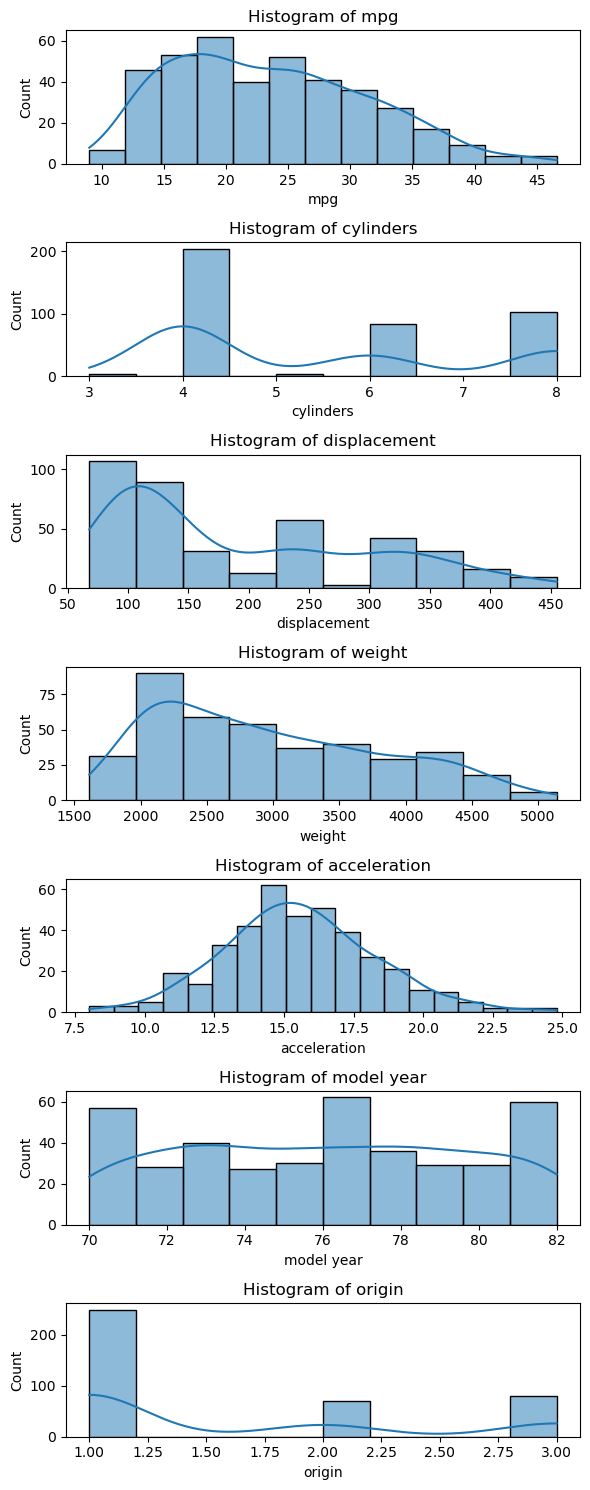

In [20]:
# Create Histograms to understand the distribution of values
columns = ["mpg", "cylinders", "displacement", "weight", "acceleration", "model year", "origin"]
data = auto_mpg

fig, ax = plt.subplots(len(columns), layout="tight", figsize=(6, 15))

for col, ax in zip(columns, ax.flat):
    sns.histplot(data=data, 
                 x=col,
                 kde=True,
                 ax=ax)
    ax.set_title(f"Histogram of {col}")

#### iii. Value Counts

In [21]:
auto_mpg["origin"].value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [22]:
# Determine the frequency of the categorical features

def value_counter(dataframe):
    value_series = pd.DataFrame()
    for col in dataframe.select_dtypes(["float", "int"]).columns:
        print(dataframe[col].value_counts())
        
        
value_counter(auto_mpg)

mpg
13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
31.9     1
16.9     1
18.2     1
22.3     1
44.0     1
Name: count, Length: 129, dtype: int64
cylinders
4    204
8    103
6     84
3      4
5      3
Name: count, dtype: int64
displacement
97.0     21
98.0     18
350.0    18
318.0    17
250.0    17
         ..
104.0     1
110.0     1
130.0     1
111.0     1
144.0     1
Name: count, Length: 82, dtype: int64
horsepower
150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
         ..
61.0      1
93.0      1
148.0     1
152.0     1
82.0      1
Name: count, Length: 94, dtype: int64
weight
1985    4
2130    4
2125    3
2945    3
2265    3
       ..
2875    1
3102    1
3664    1
2807    1
2625    1
Name: count, Length: 351, dtype: int64
acceleration
14.5    23
15.5    21
14.0    16
16.0    16
13.5    15
        ..
11.1     1
12.1     1
21.9     1
22.1     1
11.6     1
Name: count, Length: 95, dtype: int64
model year
73    40
78    36
76    34
82    31
75    30
70    2

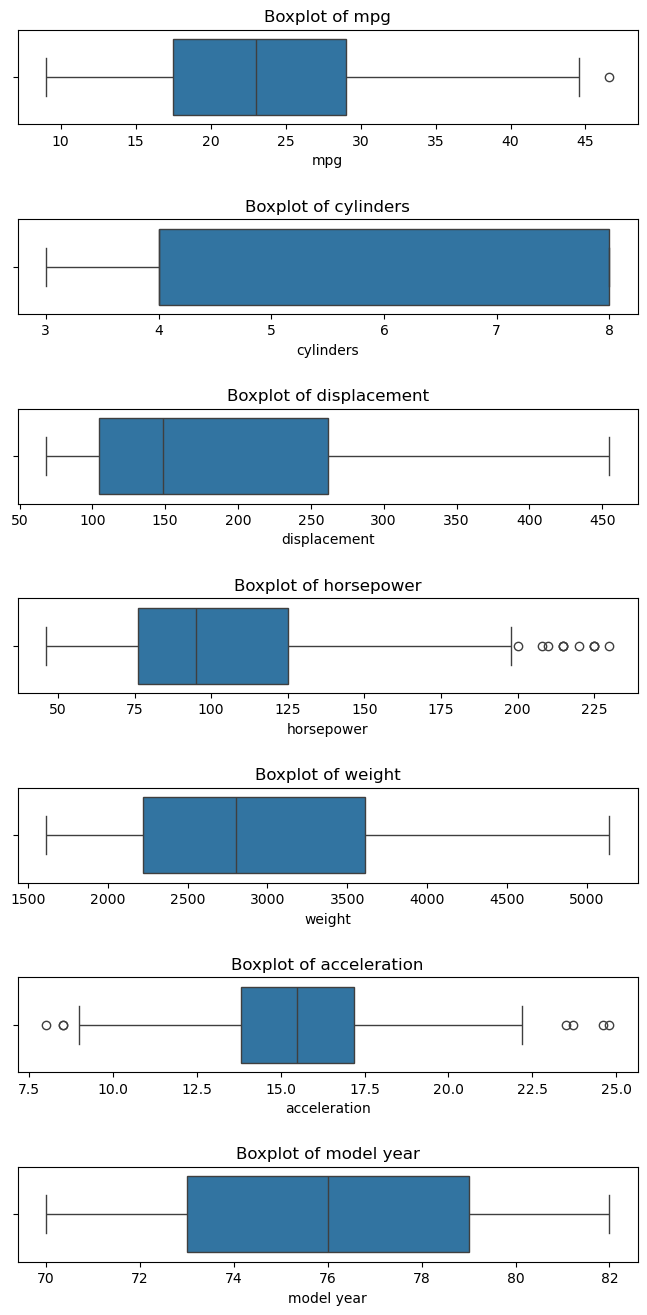

In [23]:
# Box plot of potential features
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"]
data = auto_mpg

#Adjust the figure size height of the boxplots.
fig, ax = plt.subplots(len(columns), figsize=(8,16))

for col, ax in zip(columns, ax.flat):
    sns.boxplot(data=data, 
                 x=col,
                 ax=ax)
    ax.set_title(f"Boxplot of {col}")

# Adjust the white space between plots.
plt.subplots_adjust(hspace=1.0)

plt.show();

#### iv. Coorelations and Heatmaps

<Axes: >

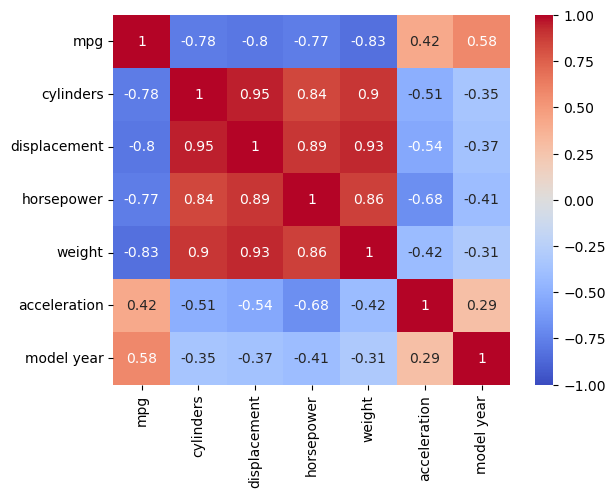

In [24]:
# Variable Relationships
sns.heatmap(auto_mpg.corr(numeric_only=True),vmin=-1, vmax=1, annot=True, cmap="coolwarm")

#### v. Pairplots

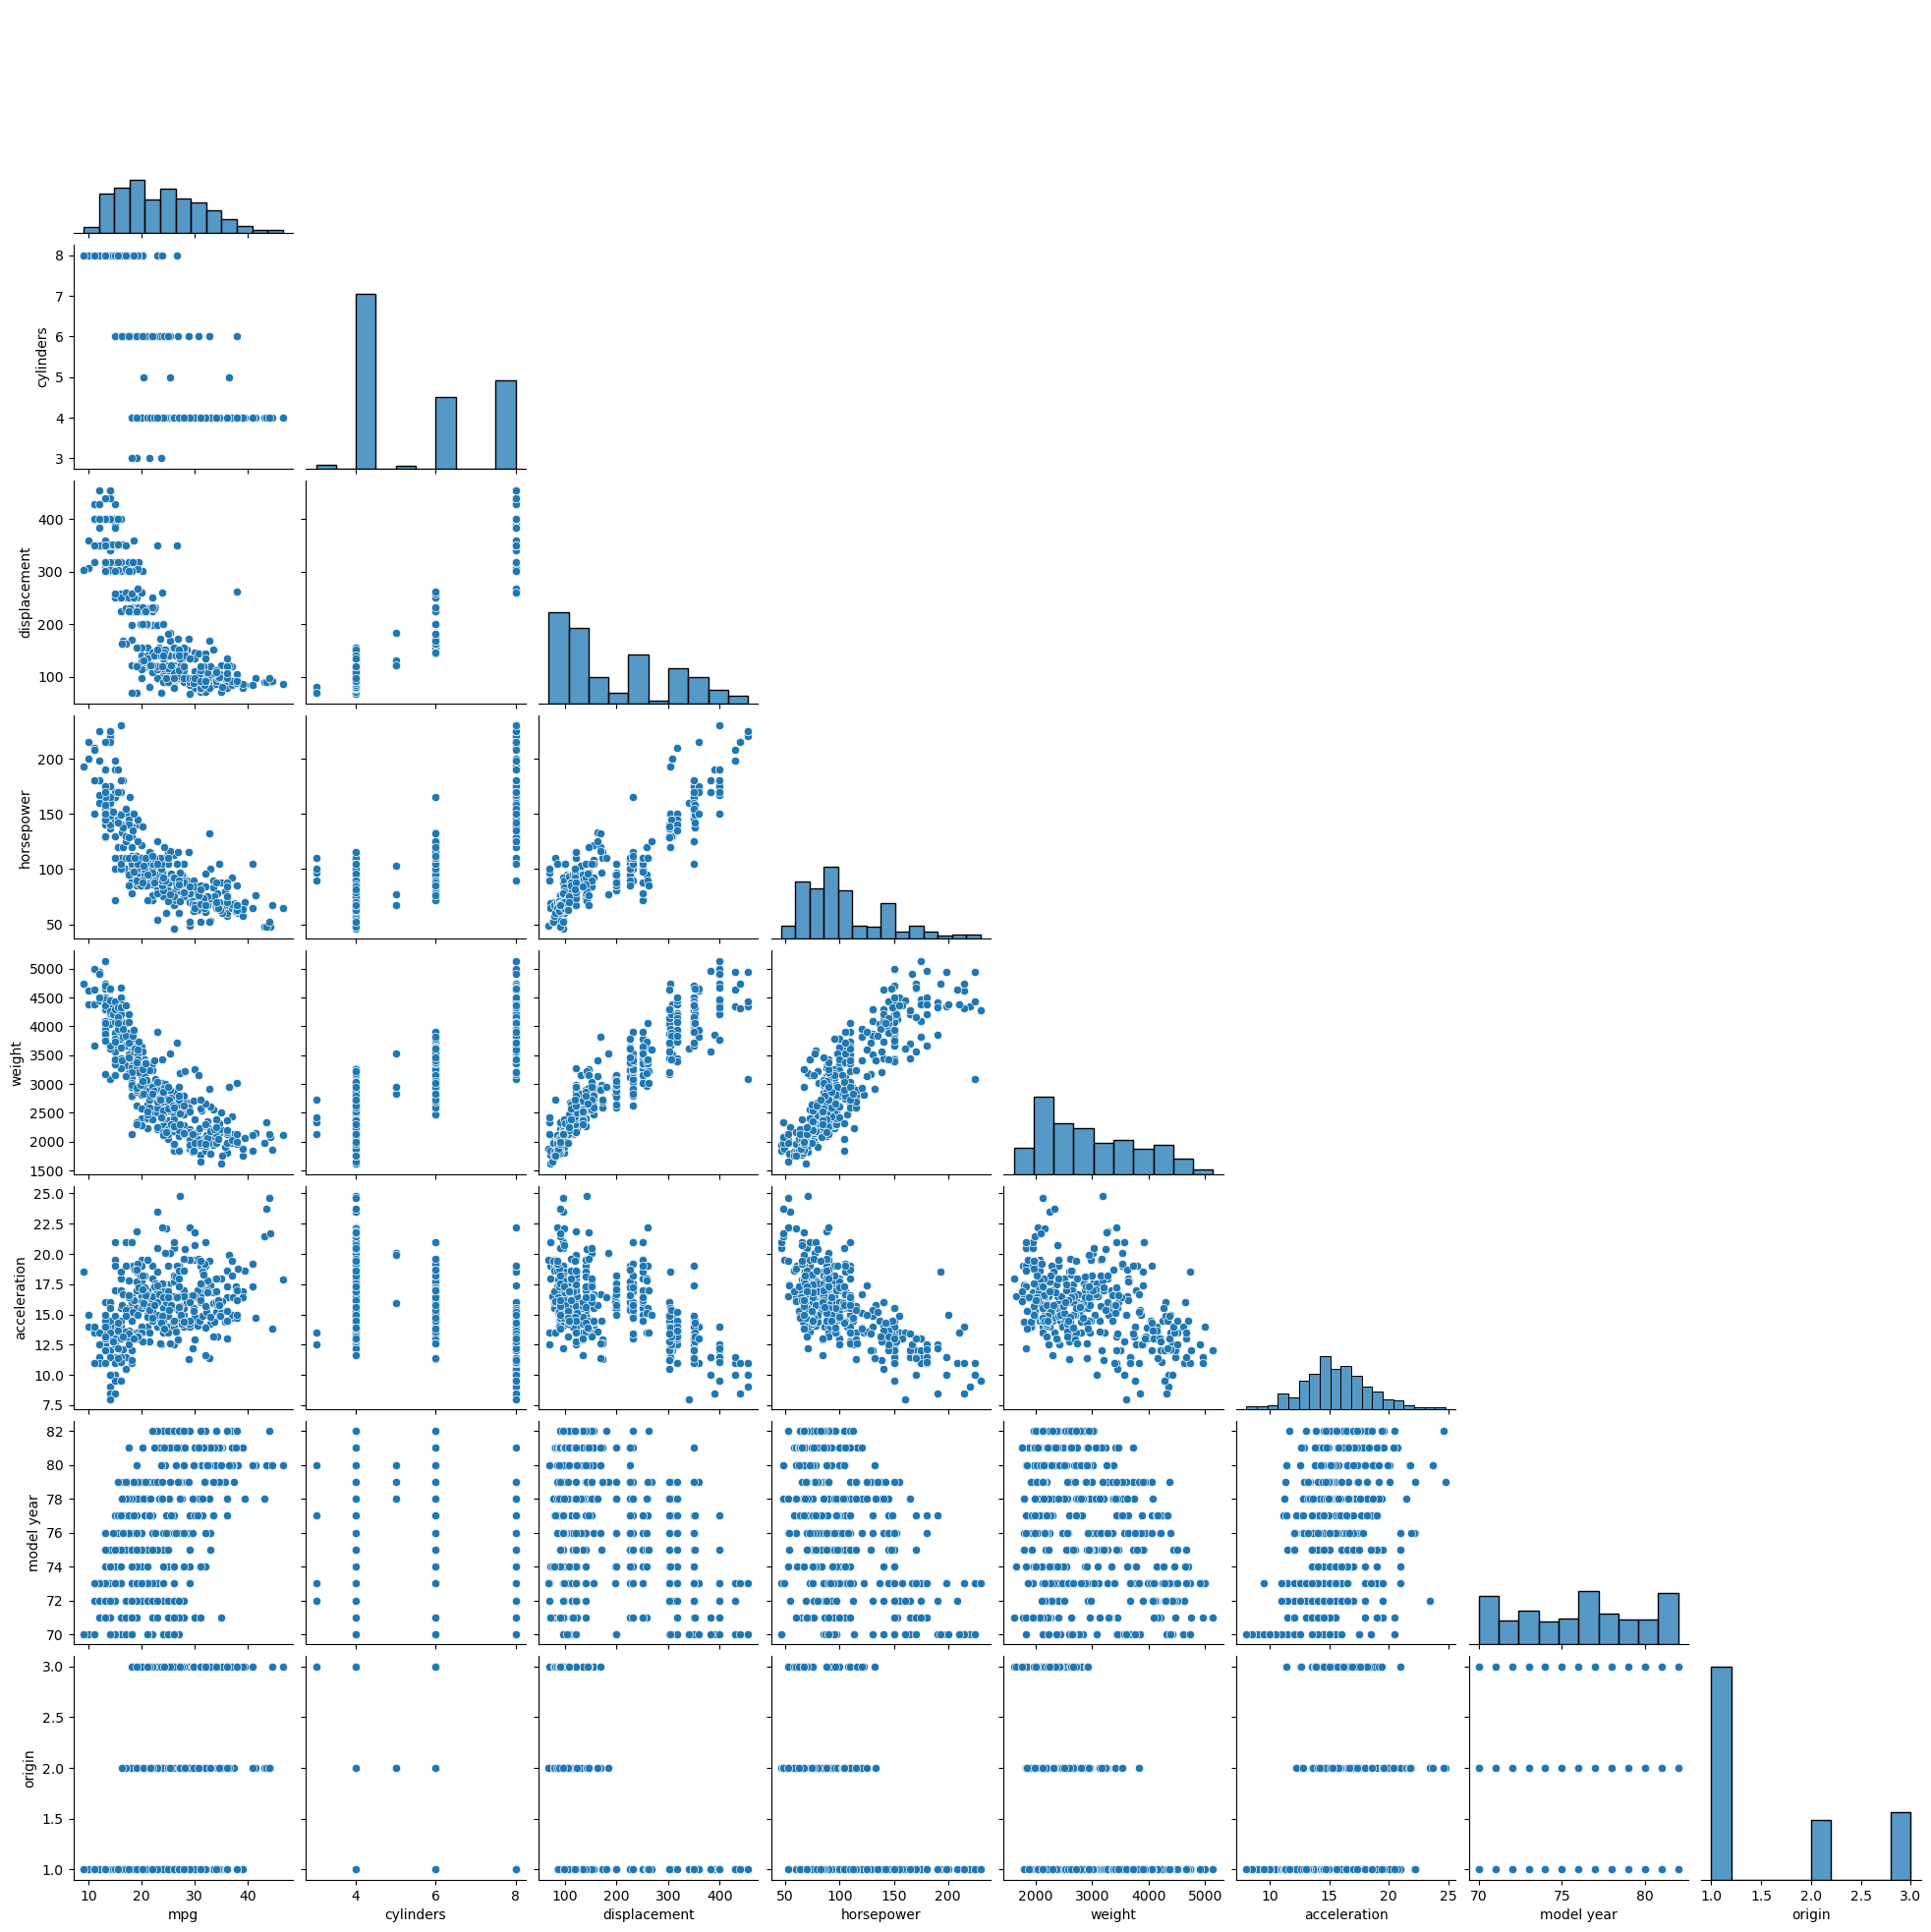

In [25]:
sns.pairplot(auto_mpg,corner=True)

#### vi. LM Plots

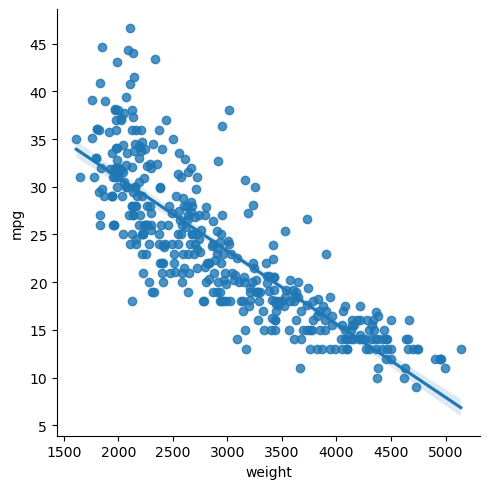

In [26]:
sns.lmplot(auto_mpg, x="weight", y="mpg");

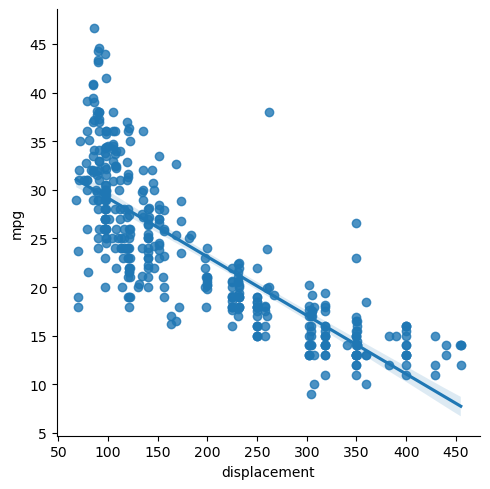

In [27]:
sns.lmplot(auto_mpg, x="displacement", y="mpg");

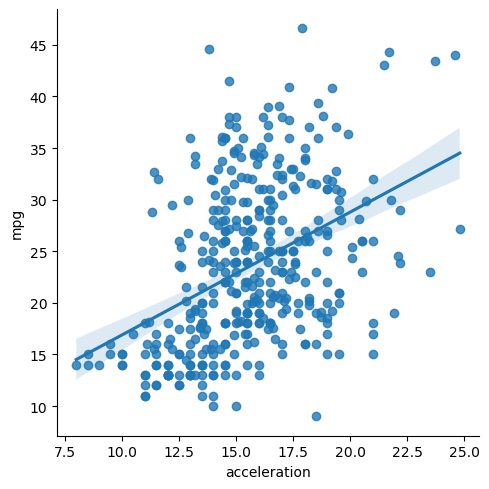

In [28]:
sns.lmplot(auto_mpg, x="acceleration", y="mpg");

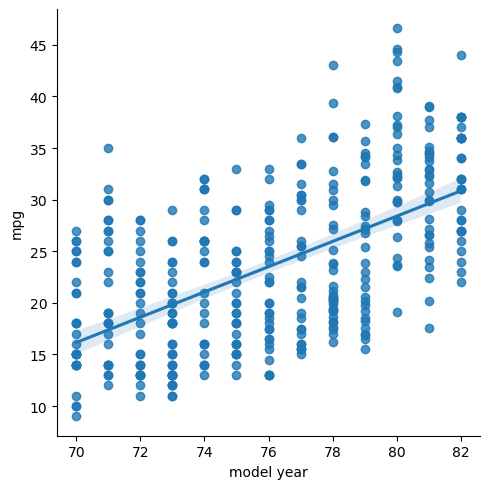

In [29]:
sns.lmplot(auto_mpg, x="model year", y="mpg");

#### vii. Bar Plots

<Axes: xlabel='origin', ylabel='mpg'>

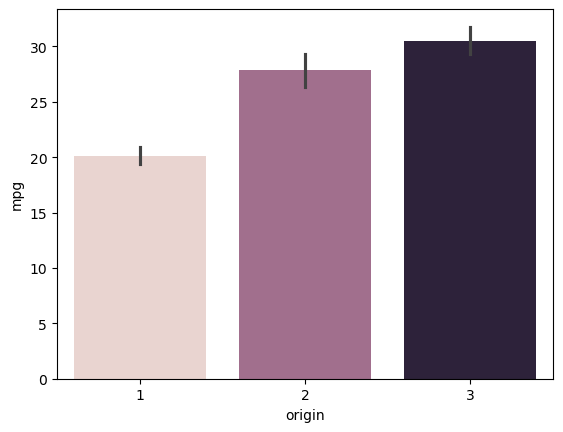

In [30]:
sns.barplot(data=auto_mpg, x="origin", y="mpg", hue="origin", legend=False)  # 1 = United States; 2 = Europe; 3 = Japan

## 5. Prep for Modeling

### a. Review Coorelation Matrix and identify strongest coorelation variable

In [31]:
auto_mpg.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000


### b. Create Initial Model

In [32]:
X = sm.add_constant(auto_mpg["weight"])
y = auto_mpg["mpg"]

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          2.97e-103
Time:                        11:00:53   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### c. Feature Engineering

In [33]:
# Create variable maps
# No object variables to map

In [34]:
# Setup Feature Engineering Dataframe

eng_df = auto_mpg.assign(
    weight2 = auto_mpg["weight"] ** 2,
    weight3 = auto_mpg["weight"] ** 3,
    weight4 = auto_mpg["weight"] ** 4,
    weight_horsepower_ratio = auto_mpg["weight"] / auto_mpg["horsepower"]
).drop(columns=["car name"], axis=1)

eng_df = pd.get_dummies(eng_df, drop_first=True)

eng_df = eng_df * 1

eng_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight2,weight3,weight4,weight_horsepower_ratio,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,43022168064,150749676896256,26.953846,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,50366053557,186001835786001,22.381818,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,40565745856,139383902761216,22.906667,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,40459583737,138897750969121,22.886667,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,41027927849,141505323151201,24.635714,0,0


In [35]:
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mpg                      398 non-null    float64
 1   cylinders                398 non-null    int64  
 2   displacement             398 non-null    float64
 3   horsepower               398 non-null    float64
 4   weight                   398 non-null    int64  
 5   acceleration             398 non-null    float64
 6   model year               398 non-null    int64  
 7   weight2                  398 non-null    int64  
 8   weight3                  398 non-null    int64  
 9   weight4                  398 non-null    int64  
 10  weight_horsepower_ratio  398 non-null    float64
 11  origin_2                 398 non-null    int32  
 12  origin_3                 398 non-null    int32  
dtypes: float64(5), int32(2), int64(6)
memory usage: 37.4 KB


### a. Data Splitting

In [36]:
features = [
#            "cylinders", 
#            "displacement", 
#            "horsepower", 
            "weight", 
            "weight2",
#            "weight3",
#            "weight4",
#            "weight_horsepower_ratio", 
#            "acceleration", 
            "model year",
            "origin_2",
            "origin_3"
           ]

X = sm.add_constant(eng_df[features])
y = eng_df["mpg"]

# Test Split Here
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

### b. Create Model

In [37]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     426.9
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          3.67e-137
Time:                        11:00:53   Log-Likelihood:                -777.07
No. Observations:                 318   AIC:                             1566.
Df Residuals:                     312   BIC:                             1589.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5485      4.088      0.379      0.705      -6.495       9.592
weight        -0.0216      0.002    -13.871      0.000      -0.025      -0.019
weight2       2.4e-06   2.35e-07     10.208      0.000    1.94e-06    2.86e-06
model year     0.8236      0.046     18.050      0.000       0.734       0.913
origin_2       1.7245      0.489      3.523      0.000       0.761       2.688
origin_3       1.1522      0.507      2.273      0.024       0.155       2.149
==============================================================================
Omnibus:                       44.666   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.755
Skew:                           0.725   Prob(JB):                     1.61e-21
Kurtosis:                       5.264   Cond. No.                     2.88e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### c. Cross Validation

In [38]:
def cross_val(X, y, n_splits):
    global y_val, X_val
    
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=2024)
    # Create a list to store validation scores for each fold

    cv_lm_tr_r2s = []
    cv_lm_tr_mae = []
    cv_lm_val_r2s = []
    cv_lm_val_mae = []
    
    for train_ind, val_ind in kf.split(X, y):
        # Subset data based on CV folds
        X_train, y_train = X.iloc[train_ind], y.iloc[train_ind]
        X_val, y_val = X.iloc[val_ind], y.iloc[val_ind]
        # Fit the Model on fold's training data
        model = sm.OLS(y_train, X_train).fit()
        # Append Validation score to list 
        cv_lm_tr_r2s.append(r2(y_train, model.predict(X_train)))
        cv_lm_tr_mae.append(mae(y_train, model.predict(X_train)))
        cv_lm_val_r2s.append(r2(y_val, model.predict(X_val),))
        cv_lm_val_mae.append(mae(y_val, model.predict(X_val),))
        
        
    print(f"All Training R2s: {[round(x, 3) for x in cv_lm_tr_r2s]}")
    print(f"Training R2s: {round(np.mean(cv_lm_tr_r2s), 3)} +- {round(np.std(cv_lm_tr_r2s), 3)}")
    
    print(f"Training MAEs: {[round(x, 3) for x in cv_lm_tr_mae]}")
    print(f"Training MAEs: {round(np.mean(cv_lm_tr_mae), 3)} +- {round(np.std(cv_lm_tr_mae), 3)}")
    print("")
        
    print(f"All Validation R2s: {[round(x, 3) for x in cv_lm_val_r2s]}")
    print(f"Cross Val R2s: {round(np.mean(cv_lm_val_r2s), 3)} +- {round(np.std(cv_lm_val_r2s), 3)}")

    print(f"All Validation MAEs: {[round(x, 3) for x in cv_lm_val_mae]}")
    print(f"Cross Val MAEs: {round(np.mean(cv_lm_val_mae), 3)} +- {round(np.std(cv_lm_val_mae), 3)}")
    
    return model
    
model = cross_val(X, y, 5)

All Training R2s: [0.866, 0.87, 0.874, 0.876, 0.88]
Training R2s: 0.873 +- 0.005
Training MAEs: [2.112, 2.137, 2.054, 2.067, 2.007]
Training MAEs: 2.075 +- 0.046

All Validation R2s: [0.892, 0.88, 0.859, 0.85, 0.843]
Cross Val R2s: 0.865 +- 0.018
All Validation MAEs: [2.036, 1.964, 2.183, 2.116, 2.375]
Cross Val MAEs: 2.135 +- 0.141


### d. Review Resudual Analysis Plots

In [39]:
def residual_analysis_plots(model):
    
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    
    predictions = model.predict()
    residuals = model.resid
    
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")   

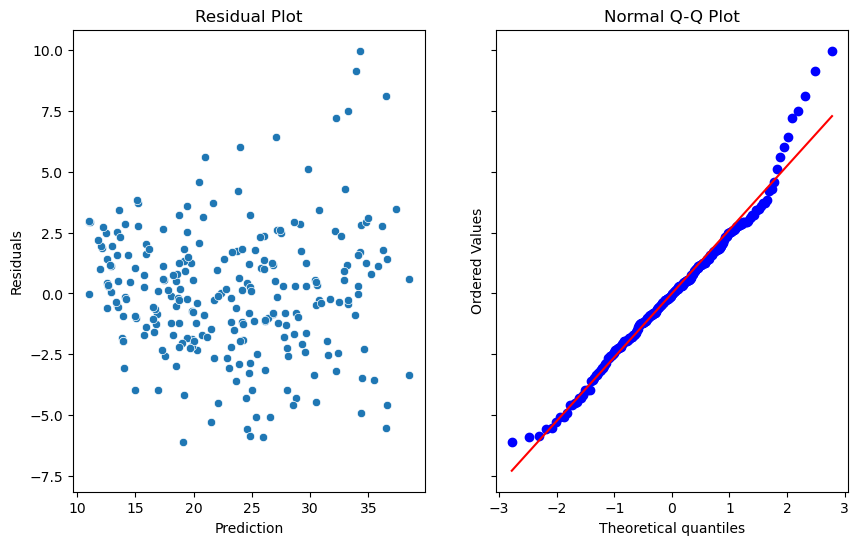

In [40]:
residual_analysis_plots(model)

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     365.2
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          2.01e-112
Time:                        11:00:53   Log-Likelihood:                -608.16
No. Observations:                 255   AIC:                             1228.
Df Residuals:                     249   BIC:                             1250.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4384      4.364      1.246      0.214      -3.156      14.033
weight        -0.0220      0.002    -13.656      0.000      -0.025      -0.019
weight2     2.467e-06   2.44e-07     10.111      0.000    1.99e-06    2.95e-06
model year     0.7831      0.048     16.295      0.000       0.688       0.878
origin_2       1.4655      0.511      2.867      0.005       0.459       2.472
origin_3       0.7337      0.544      1.349      0.178      -0.337       1.804
==============================================================================
Omnibus:                       15.678   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.908
Skew:                           0.433   Prob(JB):                     1.75e-05
Kurtosis:                       4.145   Cond. No.                     2.89e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.89e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### e. Fit final model

In [42]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     426.9
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          3.67e-137
Time:                        11:00:53   Log-Likelihood:                -777.07
No. Observations:                 318   AIC:                             1566.
Df Residuals:                     312   BIC:                             1589.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5485      4.088      0.379      0.705      -6.495       9.592
weight        -0.0216      0.002    -13.871      0.000      -0.025      -0.019
weight2       2.4e-06   2.35e-07     10.208      0.000    1.94e-06    2.86e-06
model year     0.8236      0.046     18.050      0.000       0.734       0.913
origin_2       1.7245      0.489      3.523      0.000       0.761       2.688
origin_3       1.1522      0.507      2.273      0.024       0.155       2.149
==============================================================================
Omnibus:                       44.666   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.755
Skew:                           0.725   Prob(JB):                     1.61e-21
Kurtosis:                       5.264   Cond. No.                     2.88e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Check Assumptions

#### a. Linearity - Check for no obvious curvature

In [43]:
eng_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,weight2,weight3,weight4,weight_horsepower_ratio,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,12278016,43022168064,150749676896256,26.953846,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,13638249,50366053557,186001835786001,22.381818,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,11806096,40565745856,139383902761216,22.906667,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,11785489,40459583737,138897750969121,22.886667,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,11895601,41027927849,141505323151201,24.635714,0,0


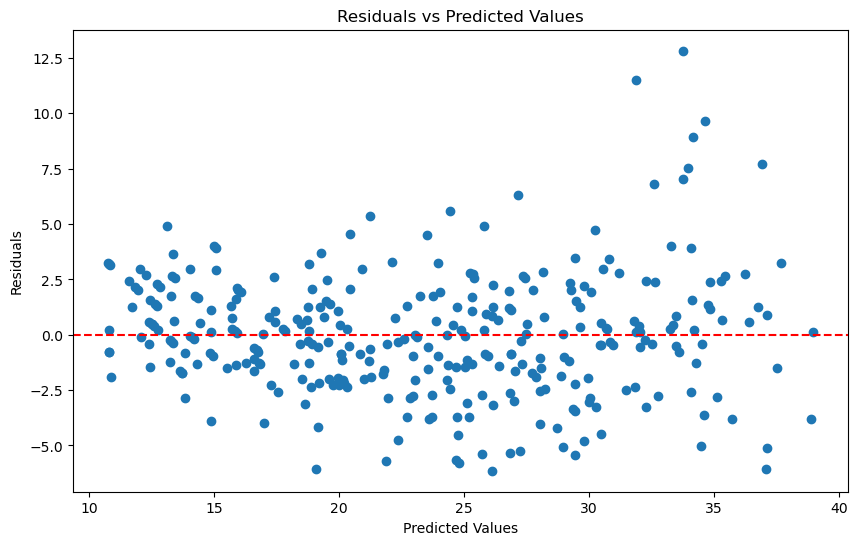

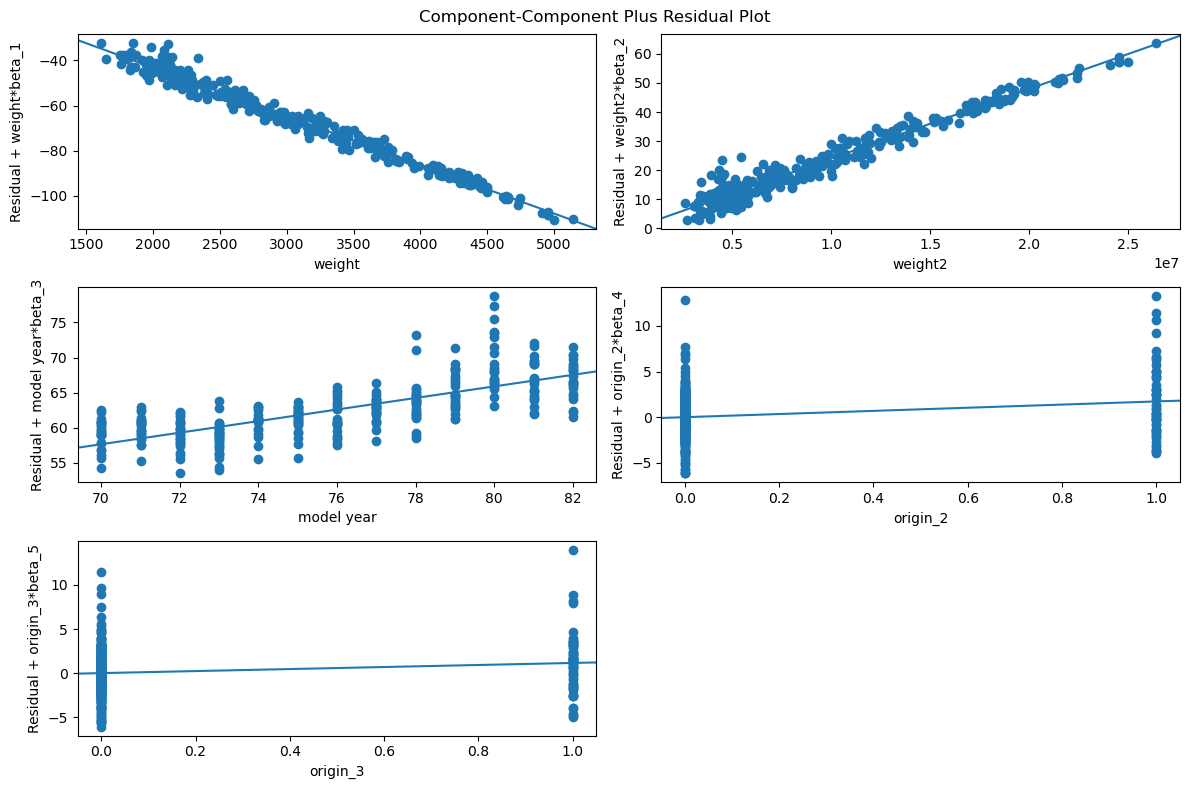

Rainbow statistic: 1.1464673880304224
Rainbow p-value: 0.1975667552468816


In [44]:
# Passes Linearity assumption!

from statsmodels.stats.diagnostic import linear_rainbow

# Example data
# df = pd.read_csv('your_data.csv')

# Fit the model
# X = eng_df[[ 
#             "weight", 
#             "weight2",
#            "weight3",
#             "model year",
#             "origin_2",
#             "origin_3"
#            ]]

# y = eng_df['mpg']
# X = sm.add_constant(X)  # Adds a constant term to the predictor variables
# model = sm.OLS(y, X).fit()

# Residual Plot
predicted = model.predict(X)
residuals = model.resid

plt.figure(figsize=(10, 6))
plt.scatter(predicted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Partial Residual Plots
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_ccpr_grid(model, fig=fig)
plt.show()

# Rainbow Test
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print('Rainbow statistic:', rainbow_statistic)
print('Rainbow p-value:', rainbow_p_value)

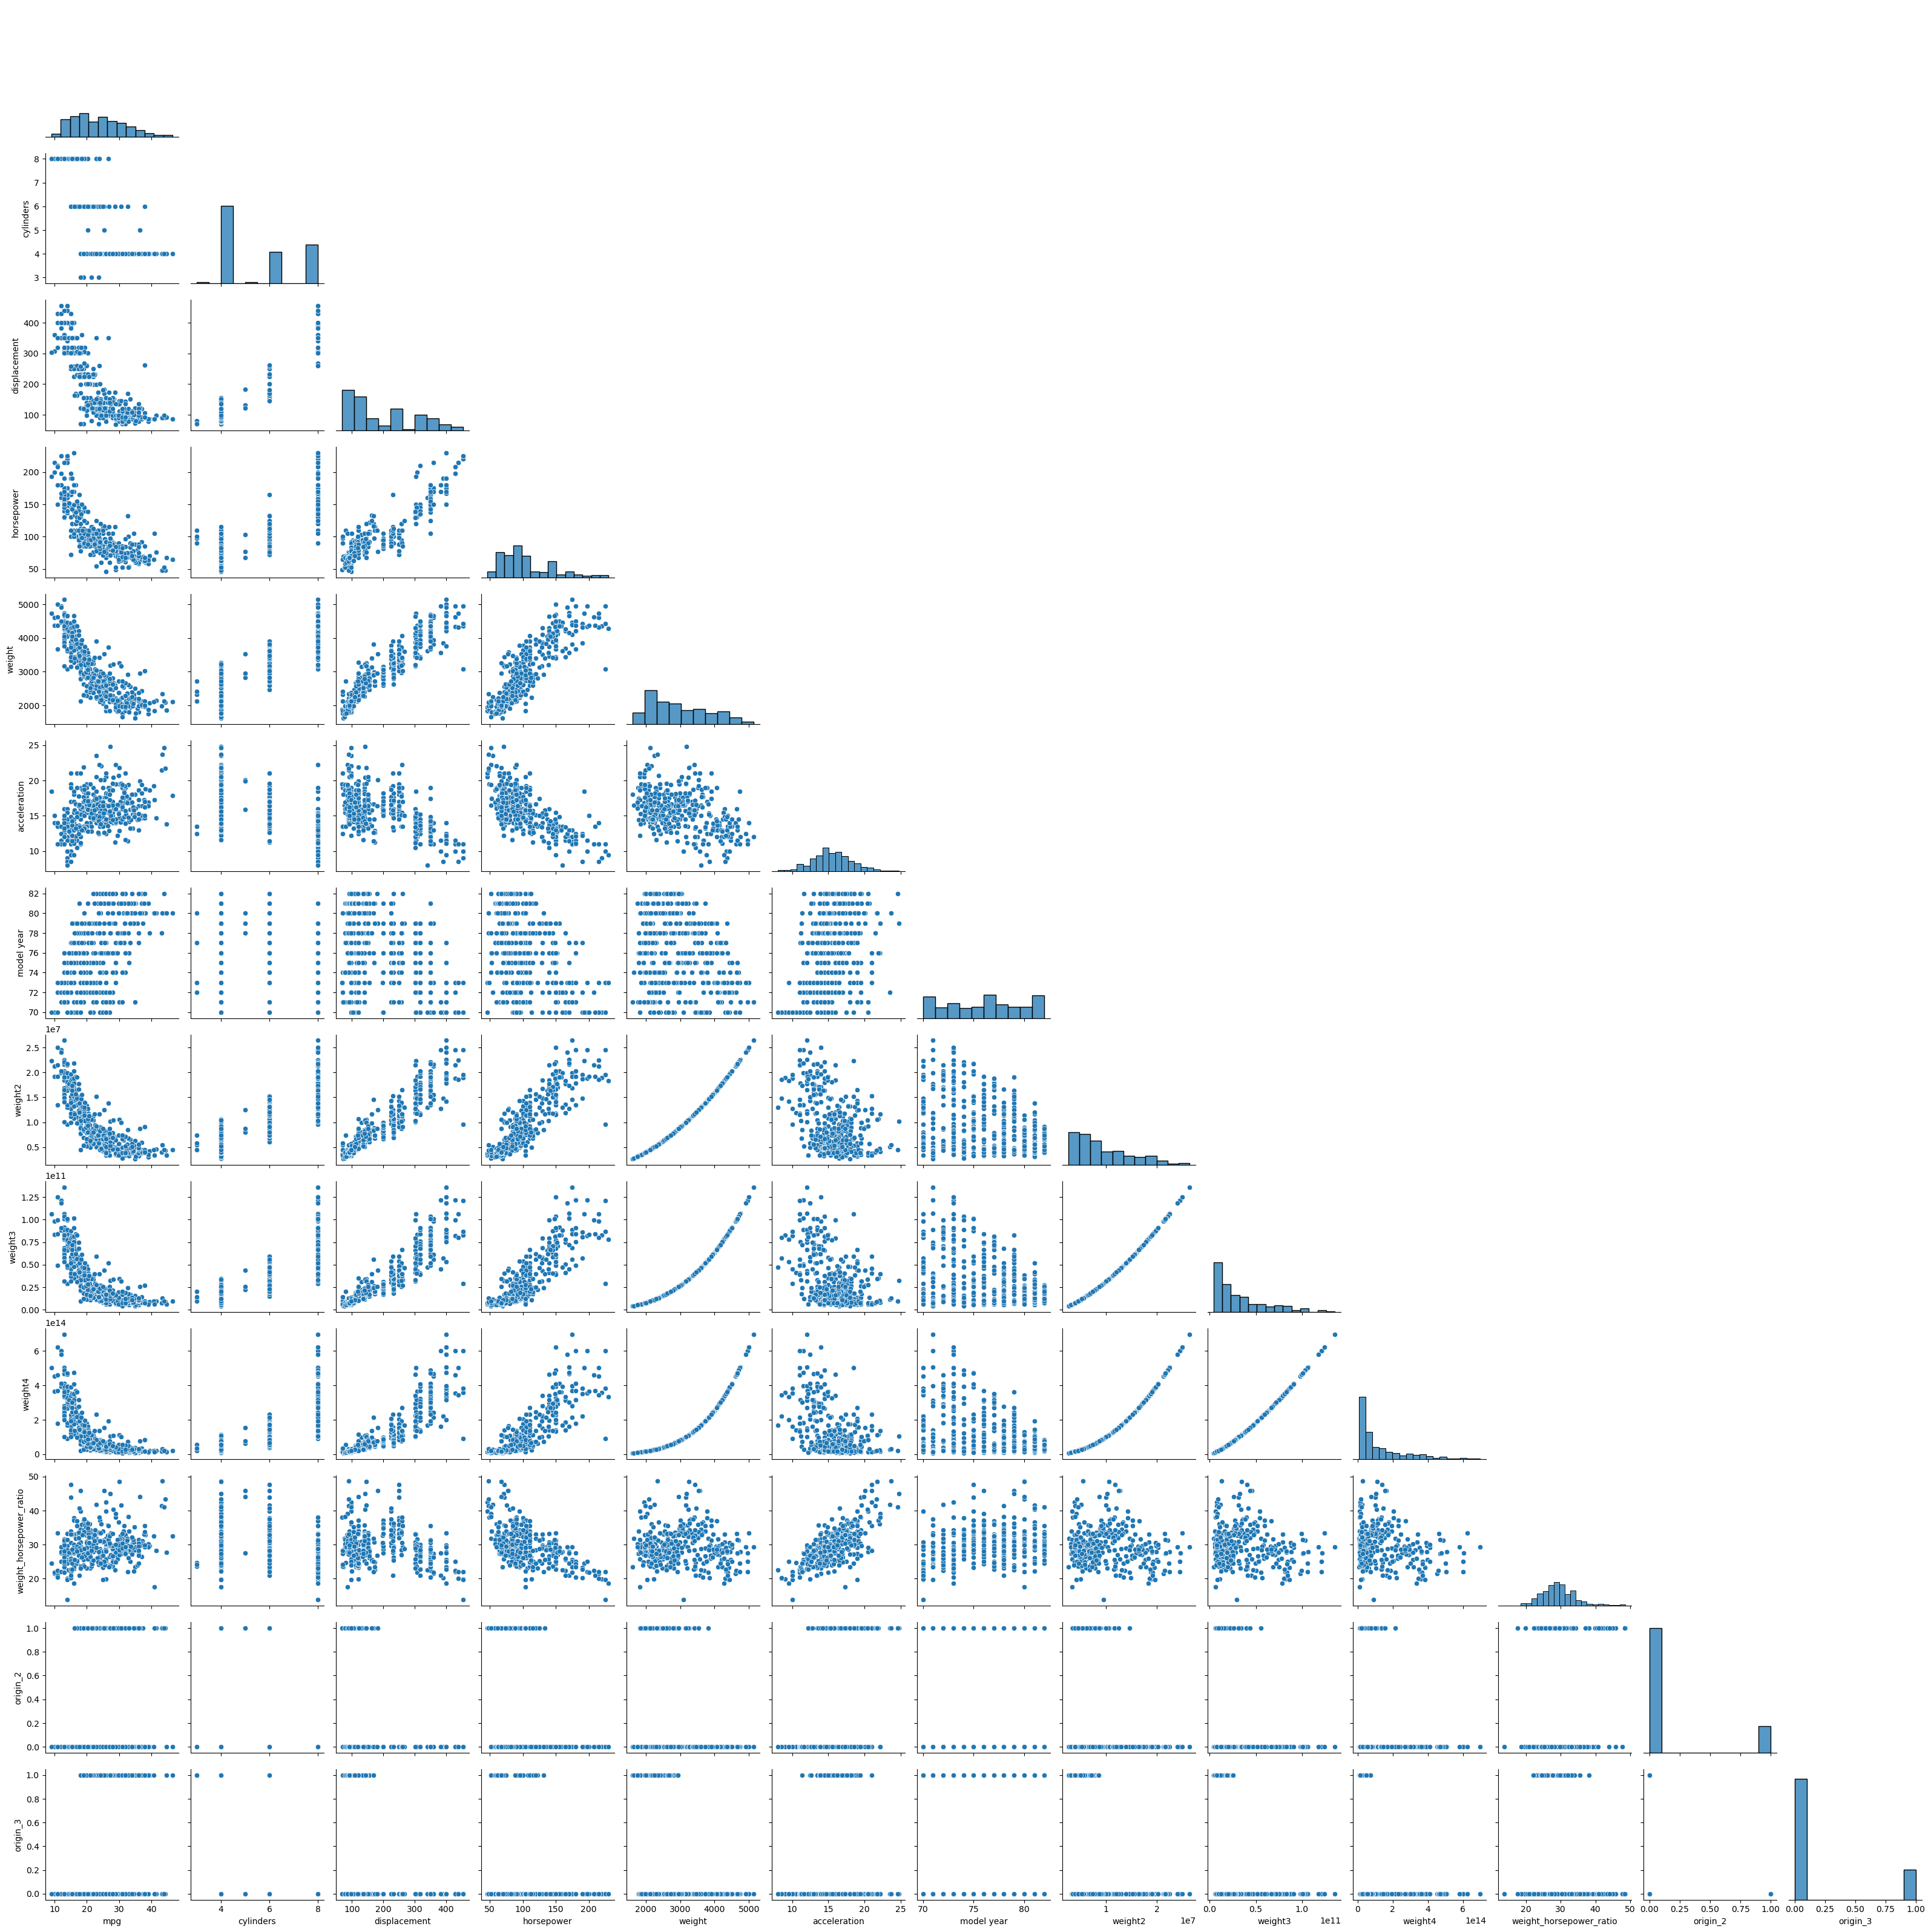

In [45]:
# Some curvature shown in the weight, weight2, weight3 and weight4 variables.
sns.pairplot(eng_df,corner=True)

#### b. Independence - DW Test Statistic shows some autocolinarity

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     426.9
Date:                Sat, 24 Aug 2024   Prob (F-statistic):          3.67e-137
Time:                        11:01:07   Log-Likelihood:                -777.07
No. Observations:                 318   AIC:                             1566.
Df Residuals:                     312   BIC:                             1589.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5485      4.088      0.379      0.705      -6.495       9.592
weight        -0.0216      0.002    -13.871      0.000      -0.025      -0.019
weight2       2.4e-06   2.35e-07     10.208      0.000    1.94e-06    2.86e-06
model year     0.8236      0.046     18.050      0.000       0.734       0.913
origin_2       1.7245      0.489      3.523      0.000       0.761       2.688
origin_3       1.1522      0.507      2.273      0.024       0.155       2.149
==============================================================================
Omnibus:                       44.666   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.755
Skew:                           0.725   Prob(JB):                     1.61e-21
Kurtosis:                       5.264   Cond. No.                     2.88e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
# The Durbin-Watson score is 2.042.  A value 2 suggests no auto-correlation.

In [48]:

import statsmodels.api as sm
import statsmodels.stats.api as sms

# Example dataset
import numpy as np
import pandas as pd

# Fitting the regression model
model = sm.OLS(y, X).fit()

# Obtaining the residuals
residuals = model.resid

# Performing the Durbin-Watson test
dw_statistic = sms.durbin_watson(residuals)

print('Durbin-Watson statistic:', dw_statistic)

Durbin-Watson statistic: 2.0421015105489437


#### c. Normality - Slighly off before log transform, much better afterwards... may not be worth interpretability

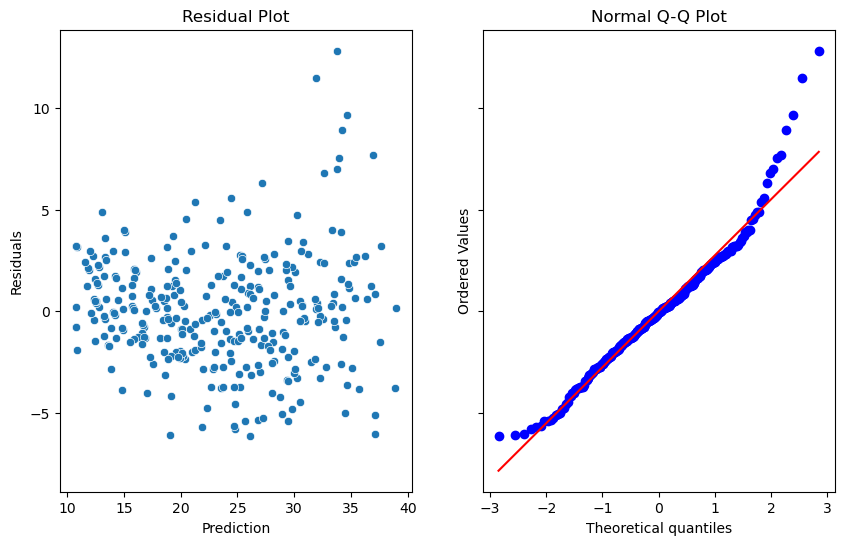

In [49]:
residual_analysis_plots(model)

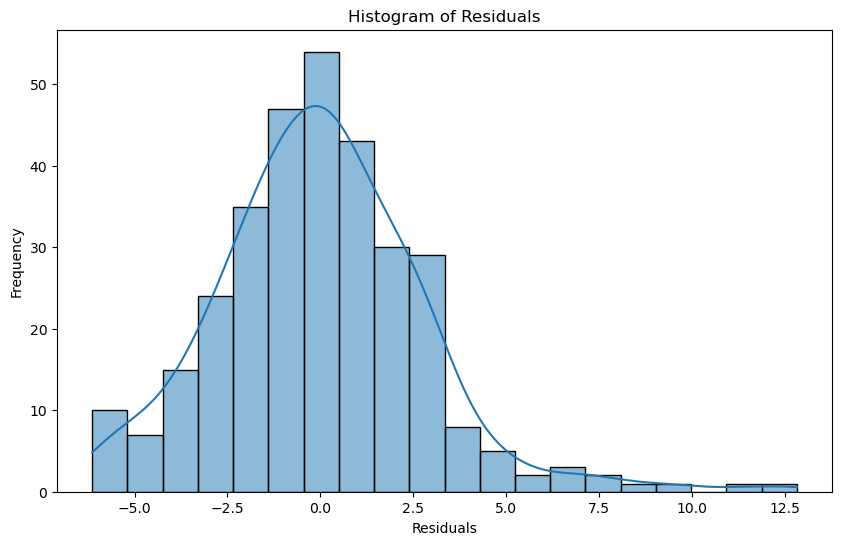

Shapiro-Wilk Test: Statistic=0.9641047504034386, p-value=4.543863028982703e-07
Kolmogorov-Smirnov Test: Statistic=0.05013866817489654, p-value=0.3881628084824733
Anderson-Darling Test: Statistic=1.4533525066018456, Critical Values=[0.569 0.648 0.777 0.907 1.079], Significance Levels=[15.  10.   5.   2.5  1. ]
Jarque-Bera Test: Statistic=95.75467084475152, p-value=1.6111553502661305e-21


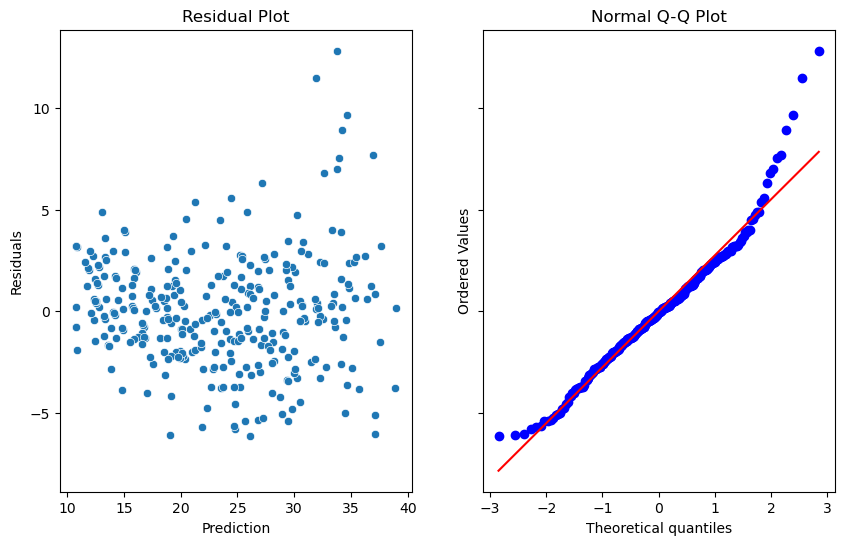

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# Assuming 'X' is your predictor matrix and 'y' is your response vector
X = sm.add_constant(X)  # Adding a constant term for the intercept
model = sm.OLS(y, X).fit()
residuals = model.resid

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
residual_analysis_plots(model)
# sm.qqplot(residuals, line='45')
# plt.title('Q-Q Plot')
# plt.show()

# Shapiro-Wilk Test
shapiro_test = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test: Statistic={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

# Kolmogorov-Smirnov Test
ks_test = stats.kstest(residuals, 'norm', args=(np.mean(residuals), np.std(residuals)))
print(f'Kolmogorov-Smirnov Test: Statistic={ks_test.statistic}, p-value={ks_test.pvalue}')

# Anderson-Darling Test
ad_test = stats.anderson(residuals, dist='norm')
print(f'Anderson-Darling Test: Statistic={ad_test.statistic}, Critical Values={ad_test.critical_values}, Significance Levels={ad_test.significance_level}')

# Jarque-Bera Test
jb_test = stats.jarque_bera(residuals)
print(f'Jarque-Bera Test: Statistic={jb_test.statistic}, p-value={jb_test.pvalue}')


#### d. No Perfect MultiCollinearity - VIFs look OK

Text(0.5, 1.0, 'Correlation Matrix')

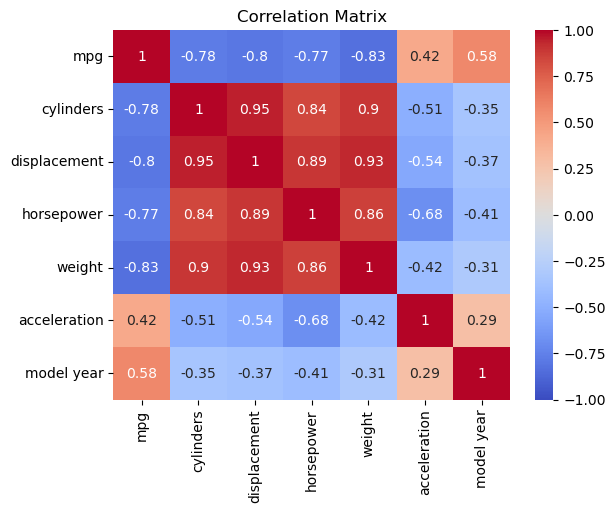

In [51]:
sns.heatmap(auto_mpg.corr(numeric_only=True),vmin=-1, vmax=1, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')

In [52]:
 # VIF Looks OK -- our parking dummy features are a bit high but no major concern

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

pd.Series(
    [vif(X.values, i) for i in range(X.shape[1])],
    index=X.columns
)

const         671.611555
weight         71.319529
weight2        68.226032
model year      1.148092
origin_2        1.377409
origin_3        1.620342
dtype: float64

#### e. Equal Variance - slight heteroskedasticity prior to log transform

In [53]:
influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df["cooks_d"].sort_values(ascending=False).head()

326    0.066815
322    0.066046
325    0.052155
244    0.042861
329    0.031454
Name: cooks_d, dtype: float64

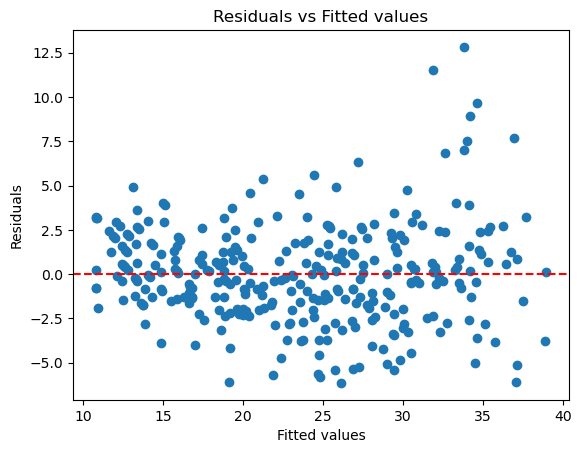

In [54]:
# Assuming 'model' is your fitted regression model
residuals = model.resid
fitted = model.fittedvalues

plt.scatter(fitted, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

In [55]:
# Breusch-Pagan Test
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming 'model' is your fitted regression model
test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
results = dict(zip(labels, test))
print(results)

{'LM Statistic': 31.5935033381324, 'LM-Test p-value': 7.150330368357214e-06, 'F-Statistic': 6.883344586372785, 'F-Test p-value': 4.118516744596675e-06}


In [56]:
print(model.model.exog[:5])  # Inspect the first few rows of the exog matrix

[[1.0000000e+00 3.8970000e+03 1.5186609e+07 7.5000000e+01 0.0000000e+00
  0.0000000e+00]
 [1.0000000e+00 3.4650000e+03 1.2006225e+07 8.1000000e+01 0.0000000e+00
  0.0000000e+00]
 [1.0000000e+00 1.9950000e+03 3.9800250e+06 8.2000000e+01 0.0000000e+00
  1.0000000e+00]
 [1.0000000e+00 2.9140000e+03 8.4913960e+06 7.5000000e+01 0.0000000e+00
  0.0000000e+00]
 [1.0000000e+00 3.6930000e+03 1.3638249e+07 7.0000000e+01 0.0000000e+00
  0.0000000e+00]]


In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["weight"] = model.model.exog_names
vif_data["VIF"] = [variance_inflation_factor(model.model.exog, i) for i in range(model.model.exog.shape[1])]
print(vif_data)

       weight         VIF
0       const  671.611555
1      weight   71.319529
2     weight2   68.226032
3  model year    1.148092
4    origin_2    1.377409
5    origin_3    1.620342


## Score Model

### a. 

In [58]:
print(f"Validation R2: {r2(y_val, model.predict(X_val),)}")
print(f"Validation MAE: {mae(y_val, model.predict(X_val),)}")

Validation R2: 0.8501991333185955
Validation MAE: 2.3021353988864344


In [59]:
print(f"Test R2: {r2(y_test, model.predict(X_test))}")
print(f"Test MAE: {mae(y_test, model.predict(X_test))}")

Test R2: 0.7818992176869588
Test MAE: 2.581501283084955


### b. Ridge Regression Score

In [60]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_tr = std.fit_transform(X.values)
X_te = std.transform(X_test.values)

In [61]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
alphas = 10 ** np.linspace(-2, 3, n_alphas)

ridge_model = RidgeCV(alphas=alphas, cv=5)

ridge_model.fit(X_tr, y)
print(f"Cross Val R2 | Ridge Model Score: {ridge_model.score(X_tr, y)}")
print(f"Cross Val MAE | Mean Absolute Error (mae): {mae(y, ridge_model.predict(X_tr))}")
print(f"Alpha: {ridge_model.alpha_}")

Cross Val R2 | Ridge Model Score: 0.8723240371925758
Cross Val MAE | Mean Absolute Error (mae): 2.080119474421711
Alpha: 0.11357333583431058
